# Exploratory Data Analysis 

<h5><b>#IT18257328</b></h5>

<b>Import Libraries</b>

In [48]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [49]:
import warnings
warnings.filterwarnings('ignore')

<b> Import csv file</b>

In [50]:
heartData = pd.read_csv('heart.csv')

In [51]:
heartData #Show dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<b>show columns names and Types</b>

In [52]:
heartData.columns.values.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

## Information on the attributes of the heart disease data set

> 1. age 
> 2. sex (1= male; 0=female)
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect (thallium heart scan or stress test)
> 14. target (0 = no heart disease; 1 = heart disease)

## Rename columns in CSV file

In [53]:
heartData = heartData.rename(columns={"cp": "chestPain", "trestbps": "bloodPressure", "fbs": "bloodSugar", "ca": "Vessels", "chol": "Cholesterol"})
#rename columns
#cp = chest pain
#trestbps = blood Pressure Level
#fbs = blood Sugar Level
#ca = Vessels 
#chol = Cholesterol Level

In [54]:
heartData['health_status'] = heartData['target']  #create new Column "health_status"

In [55]:
heartData['health_status'] = ["healthy" if x == 0 else "sick" for x in heartData['health_status']] #Assign values as char

In [56]:
heartData['gender'] = heartData['sex']  #create new Column "gender"

In [57]:
heartData['gender'] = ['F' if x == 0 else 'M' for x in heartData['gender']] #Assign values as char

In [58]:
heartData.head()#show first five values

,age,sex,chestPain,bloodPressure,Cholesterol,bloodSugar,restecg,thalach,exang,oldpeak,slope,Vessels,thal,target,health_status,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,sick,M
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,sick,M
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,sick,F
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,sick,M
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,sick,F


In [59]:
heartData.tail()#show last five values

,age,sex,chestPain,bloodPressure,Cholesterol,bloodSugar,restecg,thalach,exang,oldpeak,slope,Vessels,thal,target,health_status,gender
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,healthy,F
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,healthy,M
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,healthy,M
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,healthy,M
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,healthy,F


In [60]:
heartData.shape

(303, 16)

In [61]:
heartData.describe() # show full details of dataset

,age,sex,chestPain,bloodPressure,Cholesterol,bloodSugar,restecg,thalach,exang,oldpeak,slope,Vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [62]:
heartData.dtypes #show datatypes

age                int64
sex                int64
chestPain          int64
bloodPressure      int64
Cholesterol        int64
bloodSugar         int64
restecg            int64
thalach            int64
exang              int64
oldpeak          float64
slope              int64
Vessels            int64
thal               int64
target             int64
health_status     object
gender            object
dtype: object

**Find & show duplicate values**

In [63]:
heartData[heartData.duplicated(keep=False)]

,age,sex,chestPain,bloodPressure,Cholesterol,bloodSugar,restecg,thalach,exang,oldpeak,slope,Vessels,thal,target,health_status,gender
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,sick,M
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,sick,M


In [64]:
heartData = heartData.drop_duplicates(keep='first') #Drop duplicate values

In [65]:
heartData['health_status'].value_counts()#Find health status of peoples

sick       164
healthy    138
Name: health_status, dtype: int64

<h5><b># IT18257946</b></h5>

## Get a general idea of how each column is distributed.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'chestPain'}>,
        <AxesSubplot:title={'center':'bloodPressure'}>],
       [<AxesSubplot:title={'center':'Cholesterol'}>,
        <AxesSubplot:title={'center':'bloodSugar'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'Vessels'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

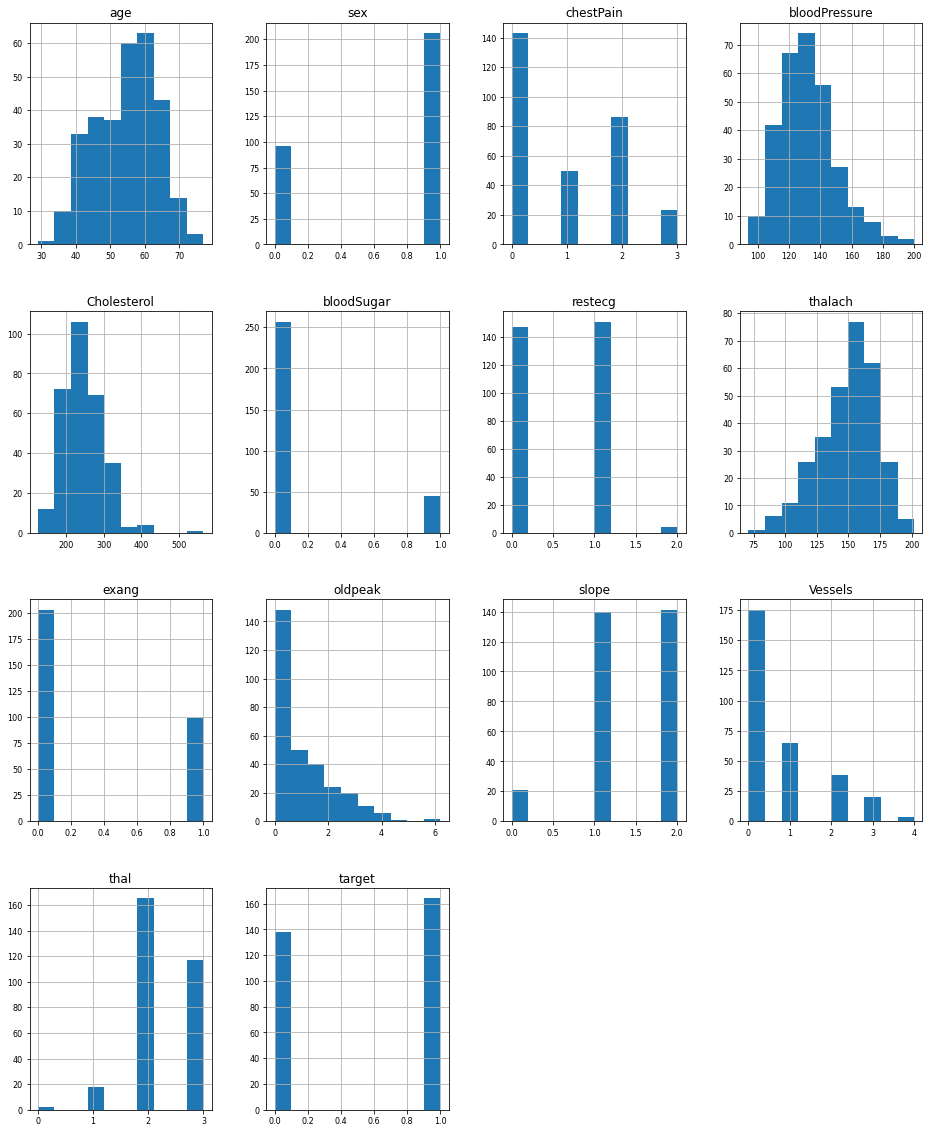

In [66]:
heartData.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8) #show figures

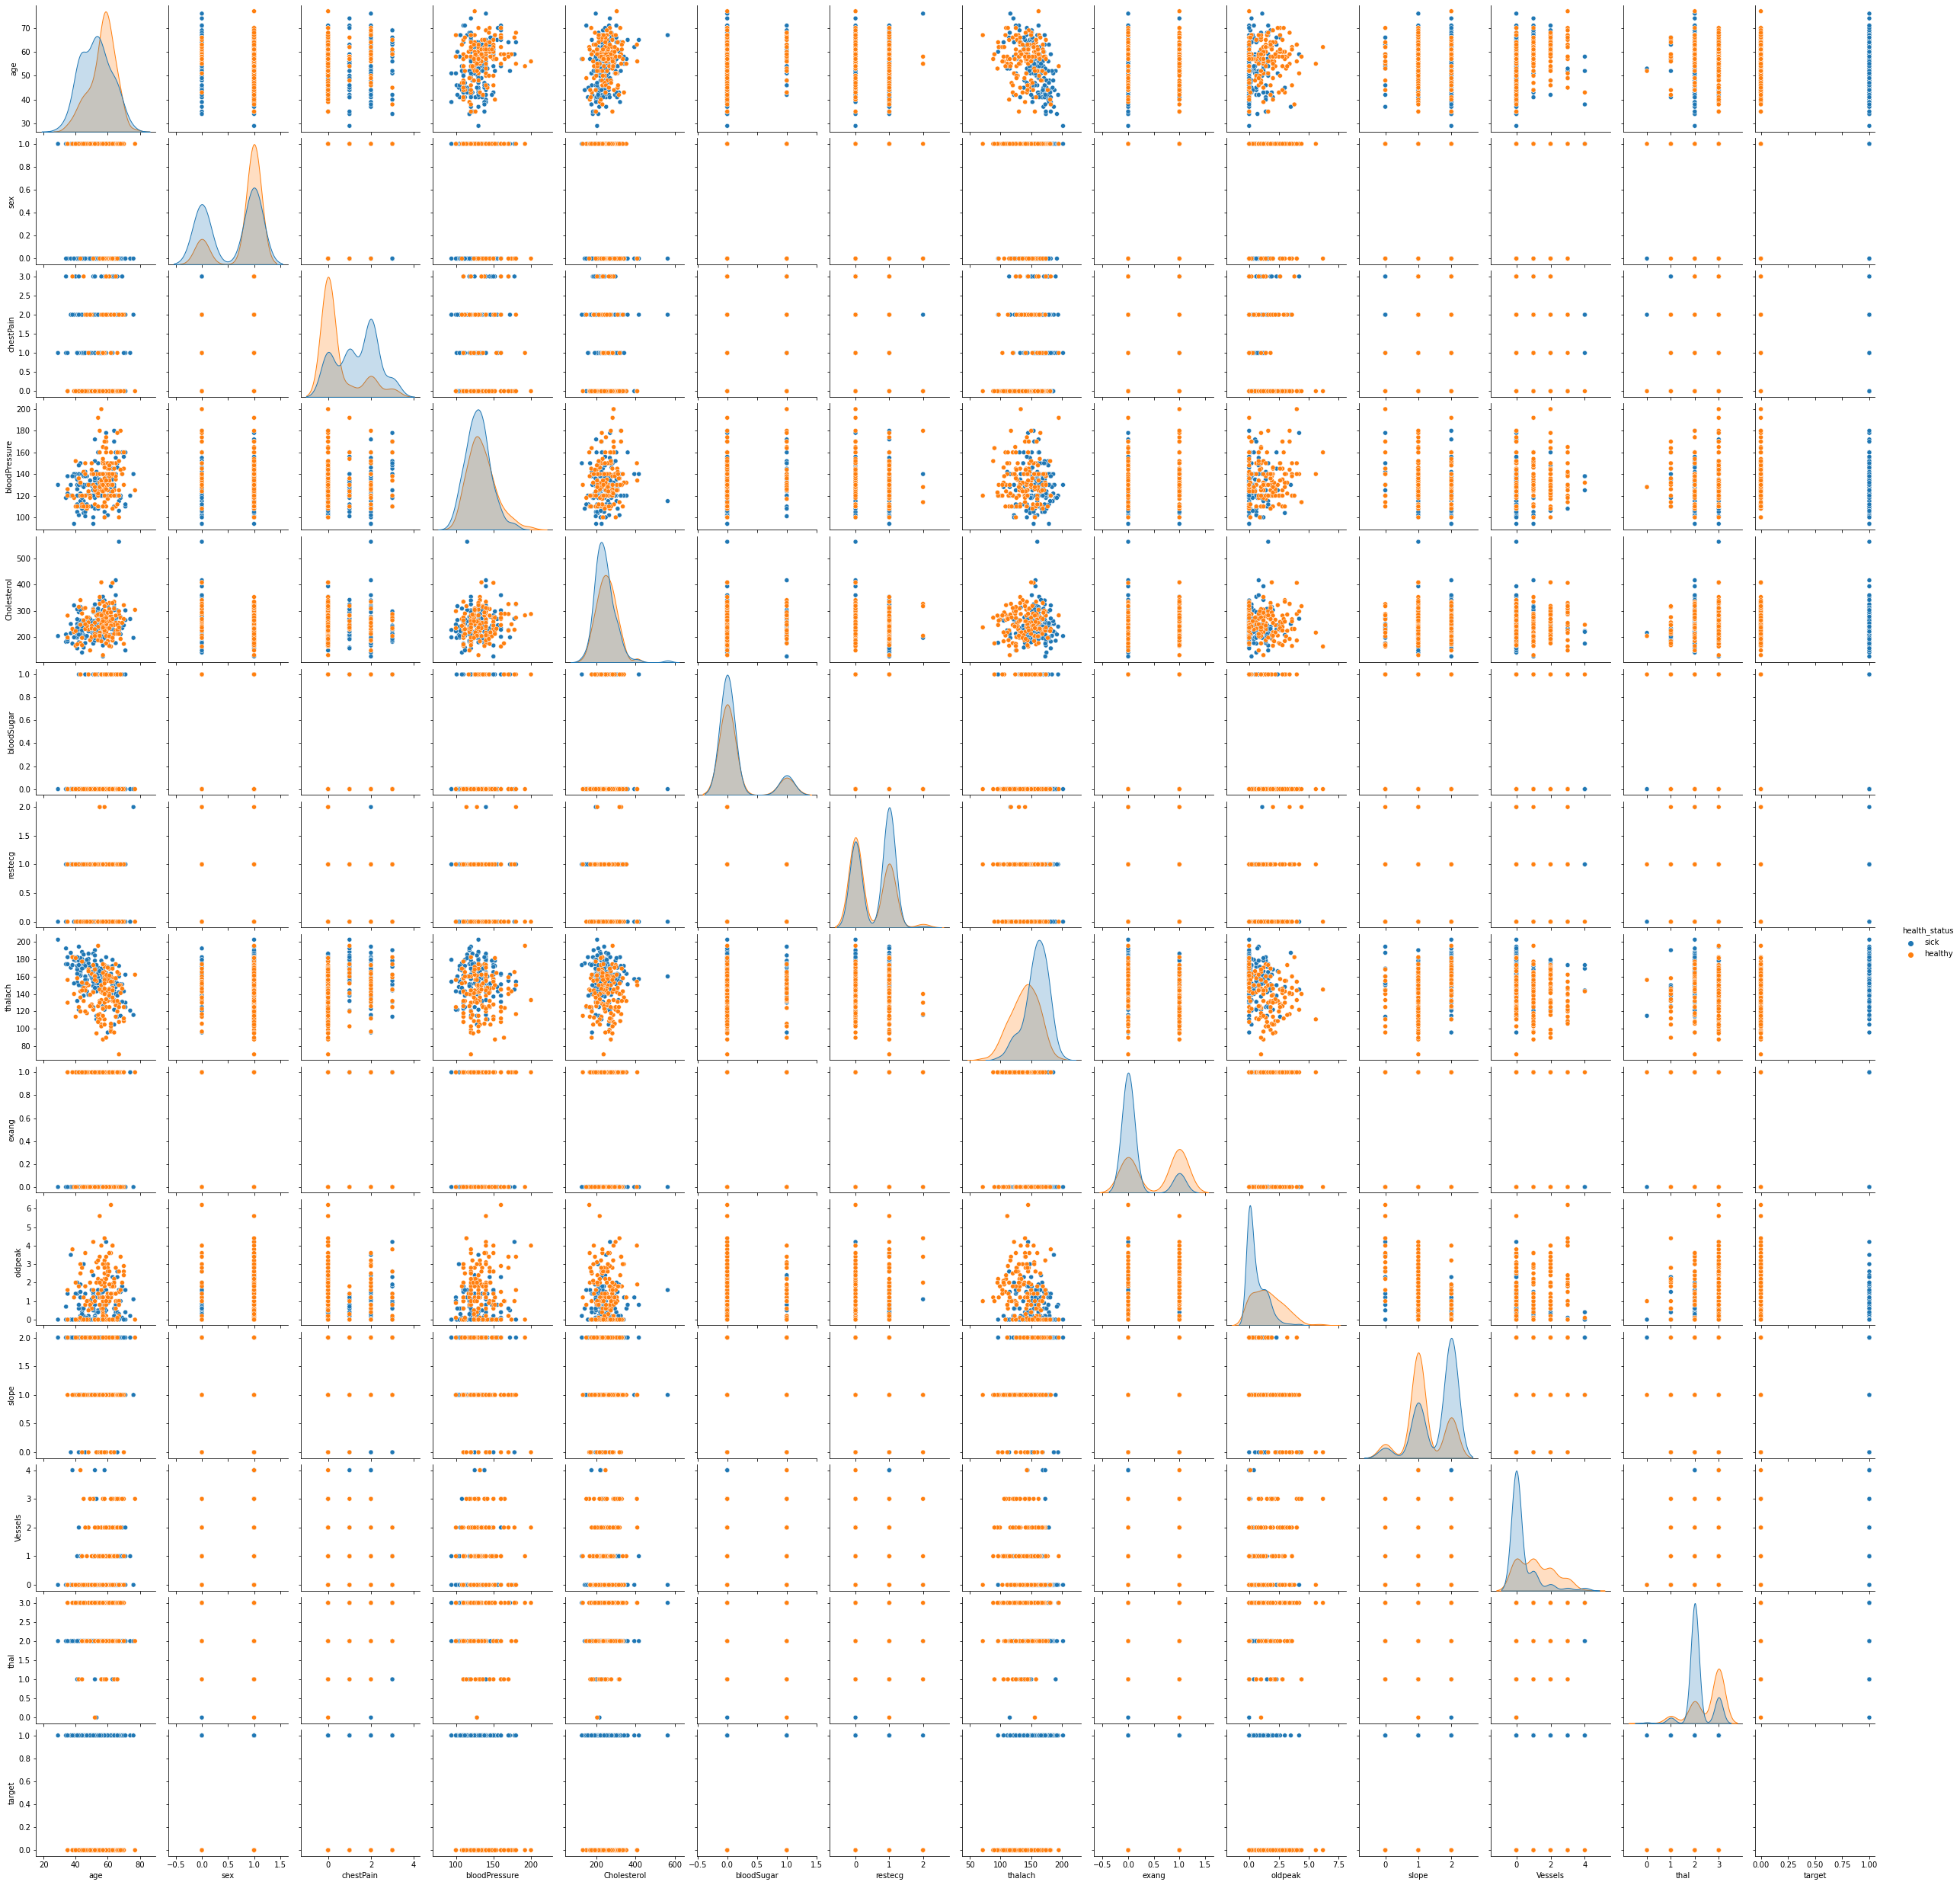

In [67]:
sns.pairplot(heartData, hue='health_status') #show plots

## Create a heatmap of correlations.

In [68]:
heartData.corr()

,age,sex,chestPain,bloodPressure,Cholesterol,bloodSugar,restecg,thalach,exang,oldpeak,slope,Vessels,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
chestPain,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
bloodPressure,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
Cholesterol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
bloodSugar,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

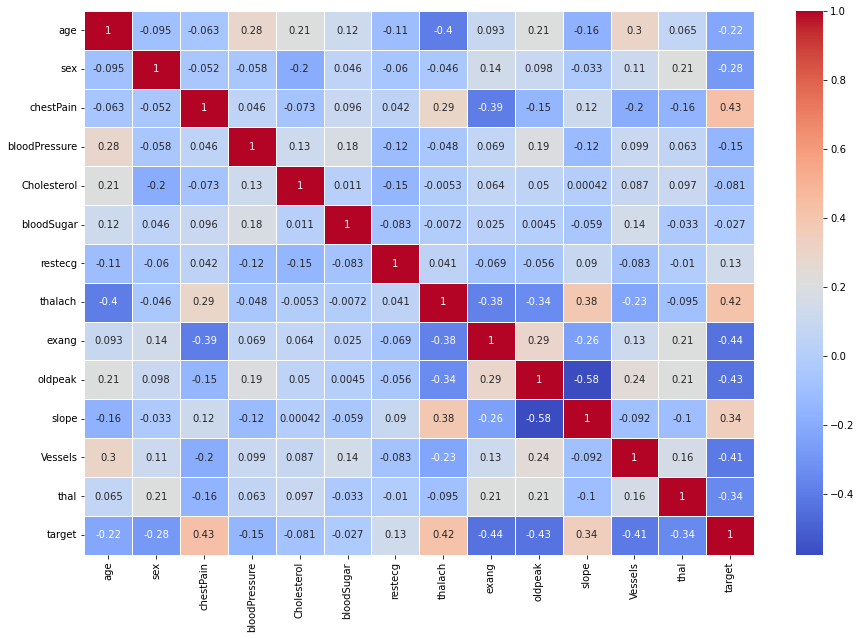

In [69]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(heartData.corr(),annot=True,cmap='coolwarm',linewidths=.5)

<h5><b>#IT18220216</b></h5>

## Zoom in on specific factors and their relationships with the target.

**There have both Males and Females and there are twice as many men here as there are women in this dataset**

In [70]:
heartData['gender'].value_counts()#count values in gender

M    206
F     96
Name: gender, dtype: int64

**Probability of heart disease according men and women**

In [71]:
heartData.groupby(['gender', 'health_status'])['gender'].count()#distribution of heart disease between gender

gender  health_status
F       healthy           24
        sick              72
M       healthy          114
        sick              92
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

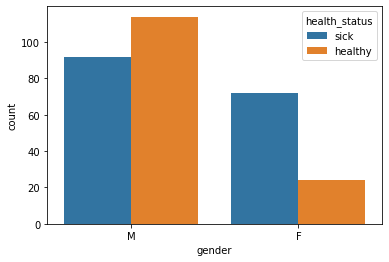

In [72]:
sns.countplot(data=heartData, x='gender', hue='health_status') #distribution of heart disease between gender

In [73]:
heartData['sex'].corr(heartData['target'])

-0.28360935779586277

**Probability of heart disease according categories of chest pain**

<AxesSubplot:xlabel='chestPain', ylabel='count'>

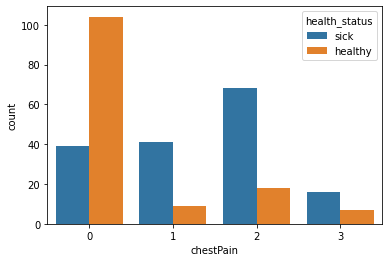

In [74]:
sns.countplot(data=heartData, x='chestPain', hue='health_status') #distribution of heart disease between chest pain

In [75]:
heartData['chestPain'].corr(heartData['target'])#distribution of heart disease between chest pain

0.4320795915664085

**Probability of heart disease according categories of slope**

<AxesSubplot:xlabel='slope', ylabel='count'>

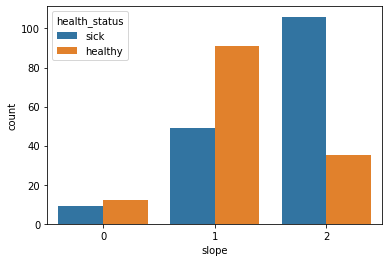

In [76]:
sns.countplot(data=heartData, x='slope', hue='health_status')#distribution of heart disease between categories of slope

In [77]:
heartData['slope'].corr(heartData['target'])#distribution of heart disease between categories of slope

0.3439395324893888

**Probability of heart disease with  heart rate**

<AxesSubplot:xlabel='thalach', ylabel='Density'>

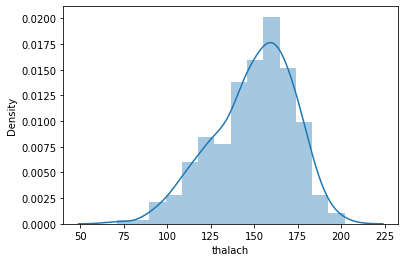

In [78]:
sns.distplot(heartData['thalach'])#distribution of heart disease with  heart rate

<AxesSubplot:xlabel='thalach', ylabel='count'>

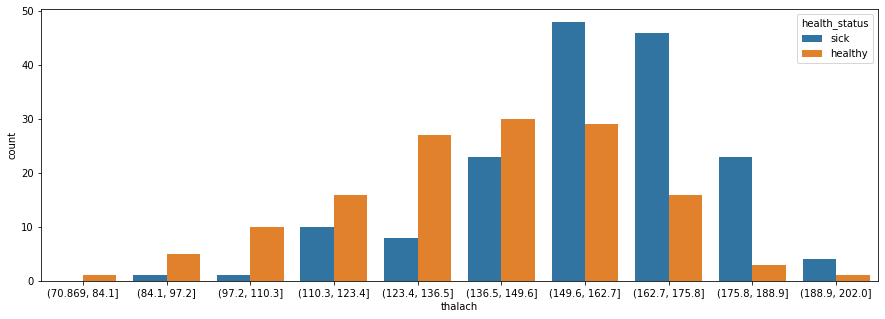

In [79]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=heartData, x=pd.cut(heartData['thalach'], 10), hue='health_status')#distribution of heart disease with  heart rate

In [80]:
heartData['thalach'].corr(heartData['target'])#distribution of heart disease with  heart rate

0.41995504366386993

<h5><b>#IT18231960</b></h5>

**Probability of heart disease according categories of thal** 

<AxesSubplot:xlabel='thal', ylabel='count'>

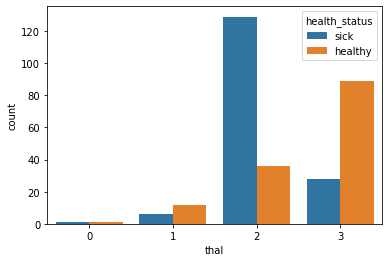

In [81]:
sns.countplot(data=heartData, x='thal', hue='health_status')#distribution of heart disease between strees

In [82]:
heartData['thal'].corr(heartData['target'])#distribution of heart disease between strees

-0.3431007123895653

**Probability of heart disease according number of heart vessels colored by flourosopy**

<AxesSubplot:xlabel='Vessels', ylabel='count'>

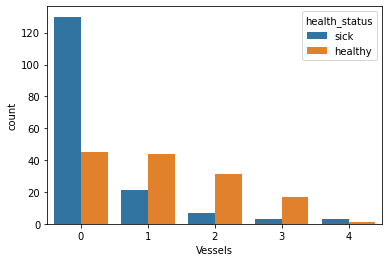

In [83]:
sns.countplot(data=heartData, x='Vessels', hue='health_status')#distribution of heart disease between number of heart vessels colored by flourosopy

In [84]:
heartData['Vessels'].corr(heartData['target'])#distribution of heart disease between number of heart vessels colored by flourosopy

-0.40899197975692836

**Probability of heart disease with oldpeak levels (binned)**

<AxesSubplot:xlabel='oldpeak', ylabel='count'>

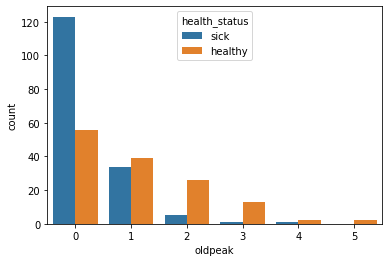

In [85]:
sns.countplot(data=heartData, x=pd.cut(heartData['oldpeak'], 6, labels=[0,1,2,3,4,5]), hue='health_status')#distribution of heart disease with ST depression

In [86]:
heartData['oldpeak'].corr(heartData['target'])#distribution of heart disease with ST depression

-0.429145832886738

In [87]:
heartData['oldpeak'].corr(heartData['Vessels'])#distribution of heart disease with ST depression

0.23656044177478674

<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

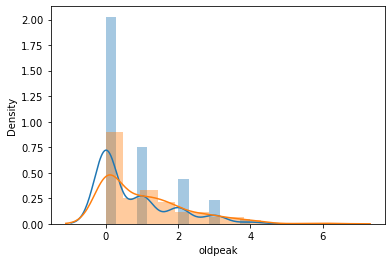

In [88]:
sns.distplot(heartData['Vessels'])
sns.distplot(heartData['oldpeak'])#distribution of heart disease with ST depression

**Probability of age**

In [89]:
heartData['age'].describe()#distribution of age

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

In [90]:
heartData['age'].mean()#distribution of age

54.420529801324506

<AxesSubplot:xlabel='age', ylabel='Density'>

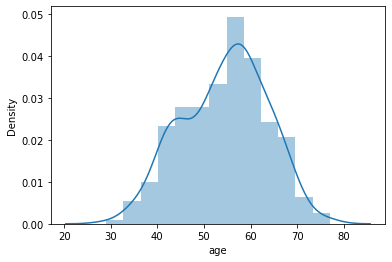

In [91]:
sns.distplot(heartData['age'])#distribution of age

<AxesSubplot:xlabel='bloodPressure', ylabel='Density'>

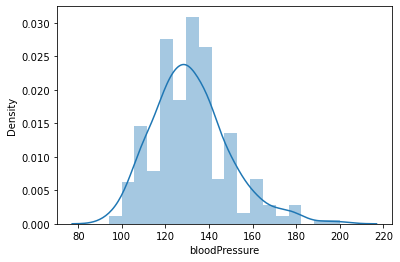

In [92]:
sns.distplot(heartData['bloodPressure'])#distribution of  Blood Pressure

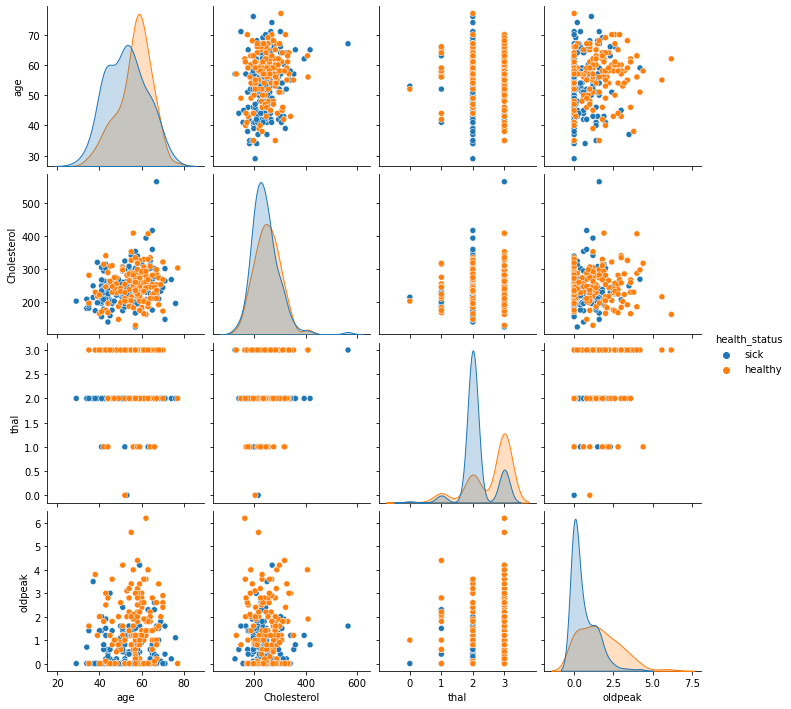

In [93]:
sns.pairplot(heartData , vars = ['age', 'Cholesterol', 'thal', 'oldpeak'], hue='health_status')